In [ ]:
# import modules 
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
from google.colab import drive 
drive.mount('/drive')
#new_datasets_sum.to_csv("/drive/My Drive/Healthcare UROP/Fall 2022/ipo_exit/MA_transformed.csv")

Mounted at /drive


In [ ]:
combined=pd.read_csv("/drive/My Drive/Healthcare UROP/Fall 2022/all.csv")

In [ ]:

us, cs=np.unique(list(combined["last financing deal type"]), return_counts=True)
list_col=list(us)
list_col

['Accelerator/Incubator',
 'Acquisition Financing',
 'Angel (individual)',
 'Bankruptcy',
 'Bankruptcy: Admin/Reorg',
 'Bankruptcy: Liquidation',
 'Buyout/LBO',
 'Corporate',
 'Corporate Asset Purchase',
 'Debt',
 'Debt - General',
 'Debt - PPP',
 'Debt Refinancing',
 'Dividend Recapitalization',
 'Early Stage VC',
 'Equity Crowdfunding',
 'Grant',
 'IPO',
 'Joint Venture',
 'Later Stage VC',
 'Merger of Equals',
 'Merger/Acquisition',
 'Other',
 'Out of Business',
 'PE Growth/Expansion',
 'PIPE',
 'Private Equity',
 'Public Investment',
 'Public Investment 2nd Offering',
 'Secondary Transaction - Open Market',
 'Secondary Transaction - Private',
 'Seed Round',
 'Series A',
 'Series B',
 'Series C',
 'Undetermined',
 'Venture Capital']

In [ ]:
len(combined[combined["last financing deal type"]=='Venture Capital'])

29

In [ ]:
count=[]
for n in list_col:
  num=len(combined[combined["last financing deal type"]==n])
  count.append(num)
  

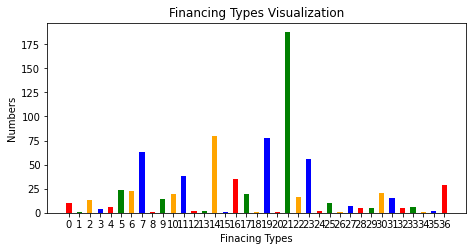

<Figure size 7.2e+19x360 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
def make_bar_graph(counts, financing_status_type):   
  # x-coordinates of left sides of bars 
  left = [n+1 for n in range(len(counts))]
    
  # heights of bars
  height = counts
    
  # labels for bars
  tick_label = [j for j in range(len(financing_status_type))]
    
  # plotting a bar chart
  plt.bar(left, height, tick_label = tick_label,
          width = 0.5, color = ['red', 'green', 'orange', "blue"])

  
  # naming the x-axis
  plt.xlabel('Finacing Types')
  # naming the y-axis
  plt.ylabel('Numbers')
  # plot title
  plt.title('Financing Types Visualization')

  f = plt.figure()
  f.set_figwidth(1000000000000000000)
  f.set_figheight(5)


    
  # function to show the plot
  plt.show()

make_bar_graph(count, list_col)

In [ ]:
from datetime import datetime
from dateutil import relativedelta

In [ ]:
def convert_date(combined): 

    month_name=["January", "February", "March", "April", "May", "June", "July", "August", 
    "September", "October", "November", "December"]
    list_month=[str(n+1) for n in range(12)]
    list_diff_date=[]

    for j in range(len(combined)): 
        
        first_date=str(combined['first financing date'][j]).lower()
        first_d=""
        if first_date!="nan": 
            for n in range(len(month_name)): 
                middle=first_date.split("-")[1]
                name_m=month_name[n][0:3]
                name_m=name_m.lower()
                if name_m==middle:
                    first_d=first_date.split("-")[0]+"-"+list_month[n]+"-"+first_date.split("-")[2]
        else: 
            first_d=""




        last_date=str(combined['last financing date'][j]).lower()
        last_d=""
            
        if last_date!="nan": 
            
            for n in range(len(month_name)): 
                middle=last_date.split("-")[1]
                name_m=month_name[n][0:3]
                name_m=name_m.lower()
                if name_m==middle:
                  last_d=last_date.split("-")[0]+"-"+list_month[n]+"-"+last_date.split("-")[2]
        else: 
            last_d=""


        if last_d!="": 
          if first_d!="": 

            delta = relativedelta.relativedelta(datetime.strptime(last_d, "%d-%m-%y"), datetime.strptime(first_d, "%d-%m-%y"))
            year=delta.years
            month=delta.months 
            day=delta.days
            store_str=str(month)+"-"+str(day)+"-"+str(year)
            list_diff_date.append(store_str)
          else: 
            list_diff_date.append("")
        else: 
            list_diff_date.append("")
            
    return list_diff_date

In [ ]:
list_diff_date=convert_date(combined)

In [ ]:
list_diff_date

In [ ]:
combined.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Number',
       'Company_name', 'Inactive', 'Address', 'Postcode', 'City', 'State',
       'State_incorporation', 'Type_entity',
       'Number_current_directors_managers', 'NAICS', 'BvD_ID', 'ISIN',
       'Ticker', 'DM_name', 'DM_title', 'IPO_date', 'Delisting_date',
       'Listing_status', 'Operating_revenue_Turnover', 'P/L_before_tax\n',
       'P/L_for_period_net_income', 'Cash_flow', 'Total_assets',
       'Shareholders_funds', 'Current_ratio', 'Profit_margin ',
       'ROE_P/L before_tax', 'ROCE_P/L_before_tax', 'Solvency_ratio',
       'Number_employees', 'PE_firms_Name', 'PE_firms_BvD_ID',
       'LEI_first_assignment_date', 'Controlling_portfolio_company_name',
       'Controlling_portfolio_company_BvD_ID', 'Current_portfolio_Name',
       'Current_portfolio_BvD_ID', 'Date_incorporation', 'LOCAL', 'TRADED',
       'five', 'ten', 'eleven', 'thirteen', 'twentythree', 'twentyfour',
       'thirty', 'fourtysix', 'oneoone', 

Financing_status

In [ ]:

financing_status_type=["Formerly VC-backed", "Corporation", "Formerly PE-Backed", 
  "Private Equity-Backed", "Corporate Backed or Acquired", "Venture Capital-Backed", "nan"]
def count_finance_status(combined, financing_status_type):
  lower_finance_status=[n.lower() for n in financing_status_type]
  status_f_com=combined['financing status']
  dict_score_finance={}
  count_type=[0 for i in range(len(financing_status_type))]
  for j in range(len(status_f_com)): 
    lower_status=str(status_f_com[j]).lower() 
    for n in range(len(lower_finance_status)): 
      if lower_status==lower_finance_status[n]:        
        f_ind=n
        f_type=lower_finance_status[n]
        count_type[f_ind]+=1
        dict_score_finance[f_ind]=count_type[f_ind]
  return dict_score_finance
dict_score_finance=count_finance_status(combined, financing_status_type)




In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dict_score_finance_type=dict(sorted(dict_score_finance.items()))
dict_score_finance_type

{0: 374, 1: 1018, 2: 94, 3: 243, 4: 370, 5: 342, 6: 61}

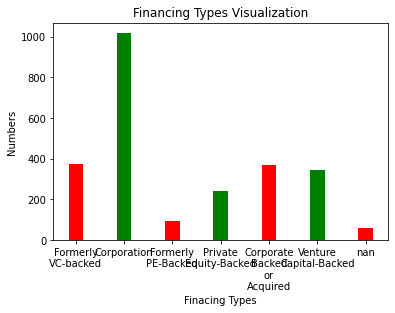

In [ ]:
def make_bar_graph(dict_score_finance_type, financing_status_type):   
  # x-coordinates of left sides of bars 
  left = [n+1 for n in range(len(dict_score_finance_type))]
    
  # heights of bars
  height = [dict_score_finance_type[j] for j in range(len(financing_status_type))]
    
  # labels for bars
  tick_label = ['\n'.join(j.split(" ")) for j in financing_status_type]
    
  # plotting a bar chart
  plt.bar(left, height, tick_label = tick_label,
          width = 0.3, color = ['red', 'green'])

  
  # naming the x-axis
  plt.xlabel('Finacing Types')
  # naming the y-axis
  plt.ylabel('Numbers')
  # plot title
  plt.title('Financing Types Visualization')


    
  # function to show the plot
  plt.show()

make_bar_graph(dict_score_finance, financing_status_type)

Business status

In [ ]:
business_status_type=["Clinical Trials", "Profitable, Out of Business", "Generating Revenue", 
"Pre-Clinical Trials", "Product Development", "Generating Revenue/Not Profitable", 
"Bankruptcy", "nan"]

def count_business_status(combined, business_status_type):

  changed_business_status=[n.lower() for n in business_status_type]
  lower_business_status=[n.split(" ") for n in changed_business_status]

  status_b_com=combined['business status']
  dict_score_business={}
  count_type=[0 for i in range(len(lower_business_status))]

  for j in range(len(status_b_com)): 
    real=str(status_b_com[j]).split(" ")
    real=[n.lower() for n in real]
    for n in range(len(lower_business_status)): 
      model=lower_business_status[n]
      if all(word in real for word in model):    
        count_type[n]+=1
        dict_score_business[n]=count_type[n]
        print("y")
      else: 
        print("no")

  return dict_score_business
dict_score_business=count_business_status(combined, business_status_type)




In [ ]:
real=str(status_b_com[0]).split(" ")
real=[n.lower() for n in real]
model=lower_business_status[0]
model

NameError: ignored

In [ ]:
business_status_type=["Clinical Trials", "Profitable, Out of Business", "Generating Revenue", 
"Pre-Clinical Trials", "Product Development", "Generating Revenue/Not Profitable", 
"Bankruptcy", "nan"]
counts, unique =np.unique(combined['business status'], return_counts=True)
changed_business_status=[n.lower() for n in business_status_type]
lower_business_status=[n.split(" ") for n in changed_business_status]

status_b_com=combined['Business status']
dict_score_business={}
count_type=[0 for i in range(len(business_status_type))]


real=str(status_b_com[1]).split(" ")
real=[n.lower() for n in real]
for n in range(len(lower_business_status)): 
  model=lower_business_status[n]
  if all(word in real for word in model):    
    count_type[f_ind]+=1
    dict_score_business[n]=count_type[f_ind]



TypeError: ignored

In [ ]:
com_select=combined['business status']
def count_unique(com_select):
  list_c=list(com_select)
  list_c=[str(n) for n in list_c]
  unique, counts =np.unique(list_c, return_counts=True)
  dict_score_business_status={}
  unique=list(unique)
  counts=list(counts)
  for n in range(len(counts)): 
    dict_score_business_status[unique[n]]=counts[n]
  return dict_score_business_status



In [ ]:
dict_score_business_status=count_unique(com_select)
dict_score_business_status

{'Bankruptcy: Admin/Reorg': 1,
 'Clinical Trials - General': 2,
 'Clinical Trials - Phase 3': 1,
 'Generating Revenue': 9,
 'Generating Revenue/Not Profitable': 3,
 'Out of Business': 3,
 'Pre-Clinical Trials': 1,
 'Product Development': 2,
 'Profitable': 11,
 'nan': 1}

In [ ]:
xlabel_name='Business Status Types'
title_name='Business Status Types Visualization'
def make_bar_graph(dict_score, combined, xlabel_name, title_name):   
  # x-coordinates of left sides of bars 
  left = [n+1 for n in range(len(dict_score_business_status))]
    
  # heights of bars
  height = [values for keys, values in dict_score_business_status.items()]
    
  # labels for bars
  x_name = [keys for keys, values in dict_score_business_status.items()]
    
  tick_label = ['\n'.join(j.split(" ")) for j in x_name]
  
  # plotting a bar chart
  plt.bar(left, height, tick_label = tick_label,
          width = 0.3, color = ['red', 'green'])

  
  # naming the x-axis
  plt.xlabel(xlabel_name)
  # naming the y-axis
  plt.ylabel('Numbers')
  # plot title
  plt.title(title_name)


    
  # function to show the plot
  plt.show()

make_bar_graph(dict_score_business_status, combined, xlabel_name, title_name)

NameError: ignored

Financing deal class

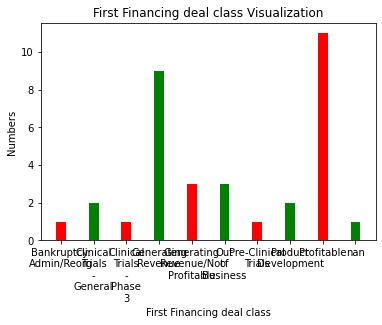

In [ ]:
com_select=combined['First Financing deal class']
dict_score_first_financing_status=count_unique(com_select)
xlabel_name= 'First Financing deal class'
title_name='First Financing deal class Visualization'
make_bar_graph(dict_score_first_financing_status, combined, xlabel_name, title_name) 

In [ ]:
com_select=combined['First Financing deal class']
dict_score_first_financing_status=count_unique(com_select)
xlabel_name= 'First Financing deal class'
title_name='First Financing deal class Visualization'
make_bar_graph(dict_score_first_financing_status, combined, xlabel_name, title_name) 

In [ ]:
combined.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Number',
       'Company_name', 'Inactive', 'Address', 'Postcode', 'City', 'State',
       'State_incorporation', 'Type_entity',
       'Number_current_directors_managers', 'NAICS', 'BvD_ID', 'ISIN',
       'Ticker', 'DM_name', 'DM_title', 'IPO_date', 'Delisting_date',
       'Listing_status', 'Operating_revenue_Turnover', 'P/L_before_tax\n',
       'P/L_for_period_net_income', 'Cash_flow', 'Total_assets',
       'Shareholders_funds', 'Current_ratio', 'Profit_margin ',
       'ROE_P/L before_tax', 'ROCE_P/L_before_tax', 'Solvency_ratio',
       'Number_employees', 'PE_firms_Name', 'PE_firms_BvD_ID',
       'LEI_first_assignment_date', 'Controlling_portfolio_company_name',
       'Controlling_portfolio_company_BvD_ID', 'Current_portfolio_Name',
       'Current_portfolio_BvD_ID', 'Date_incorporation', 'LOCAL', 'TRADED',
       'five', 'ten', 'eleven', 'thirteen', 'twentythree', 'twentyfour',
       'thirty', 'fourtysix', 'oneoone', 

In [ ]:
(1) First_financing_status: ["Formerly VC-backed", "Corporation", "Formerly PE-Backed", 
"Private Equity-Backed", "Corporate Backed or Acquired", "Venture Capital-Backed"]

(2) Business_status: ["Clinical Trials", "Profitable, Out of Business", "Generating Revenue", 
"Pre-Clinical Trials", "Product Development", "Generating Revenue/Not Profitable", 
"Bankruptcy"]

(3) Last/First financing_deal_class: ["Public Investment", "Corporate", "Private Equity", 
"Out of Business", "Venture Capital", "Other", "Individual"]

(4) first/last financing_deal_type: ["Grant", "Secondary Transaction", 
"Pre/Accelerator/Incubator", "Angel", "Seed Round", "Early Stage VC", "Later Stage VC", 
"Other Stages", "Round 1", "Round 2", "Round 3", "Later rounds", "Seed", "Series A", 
"Series A1", "Series B", "Series C", "Series D", "Later series", "Buyout/LBO", 
"Management buyout", "Management buy-In", "Add-on", "Secondary buyout", "Public to private", 
"Privatization", "Corporate divestiture", "Other", "PE Growth/Expansion" , "PIPE", 
"Investor buyout by mgt.", "GP Stakes", "Merger/Acquisition", "Merger of equals"
, "Reverse merger", "Non-Control Transactions", "Corporate", "Restart corporate"
, "Joint Venture", "Debt General", "Convertible debt", "Debt conversion", "Debt repayment"
, "Refinancing", "Leveraged recapitalization", "Recapitalization",
"Dividend recapitalization", "IPO", "Secondary offering", "Share repurchase", "Dividend", 
"Bankruptcy: Liquidation", "Bankruptcy: Admin/Reorg", "Out of Business"]

